### 로지스틱 회귀분석

In [1]:
library(ISLR)
library(ggplot2)

In [2]:
options(repr.plot.width = 16, repr.plot.height = 9)

In [3]:
getwd()

[1] "/root/R/regression analysis/RA 2"

In [4]:
Default = read.csv("../data/Default.csv", stringsAsFactors = T)
head(Default)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


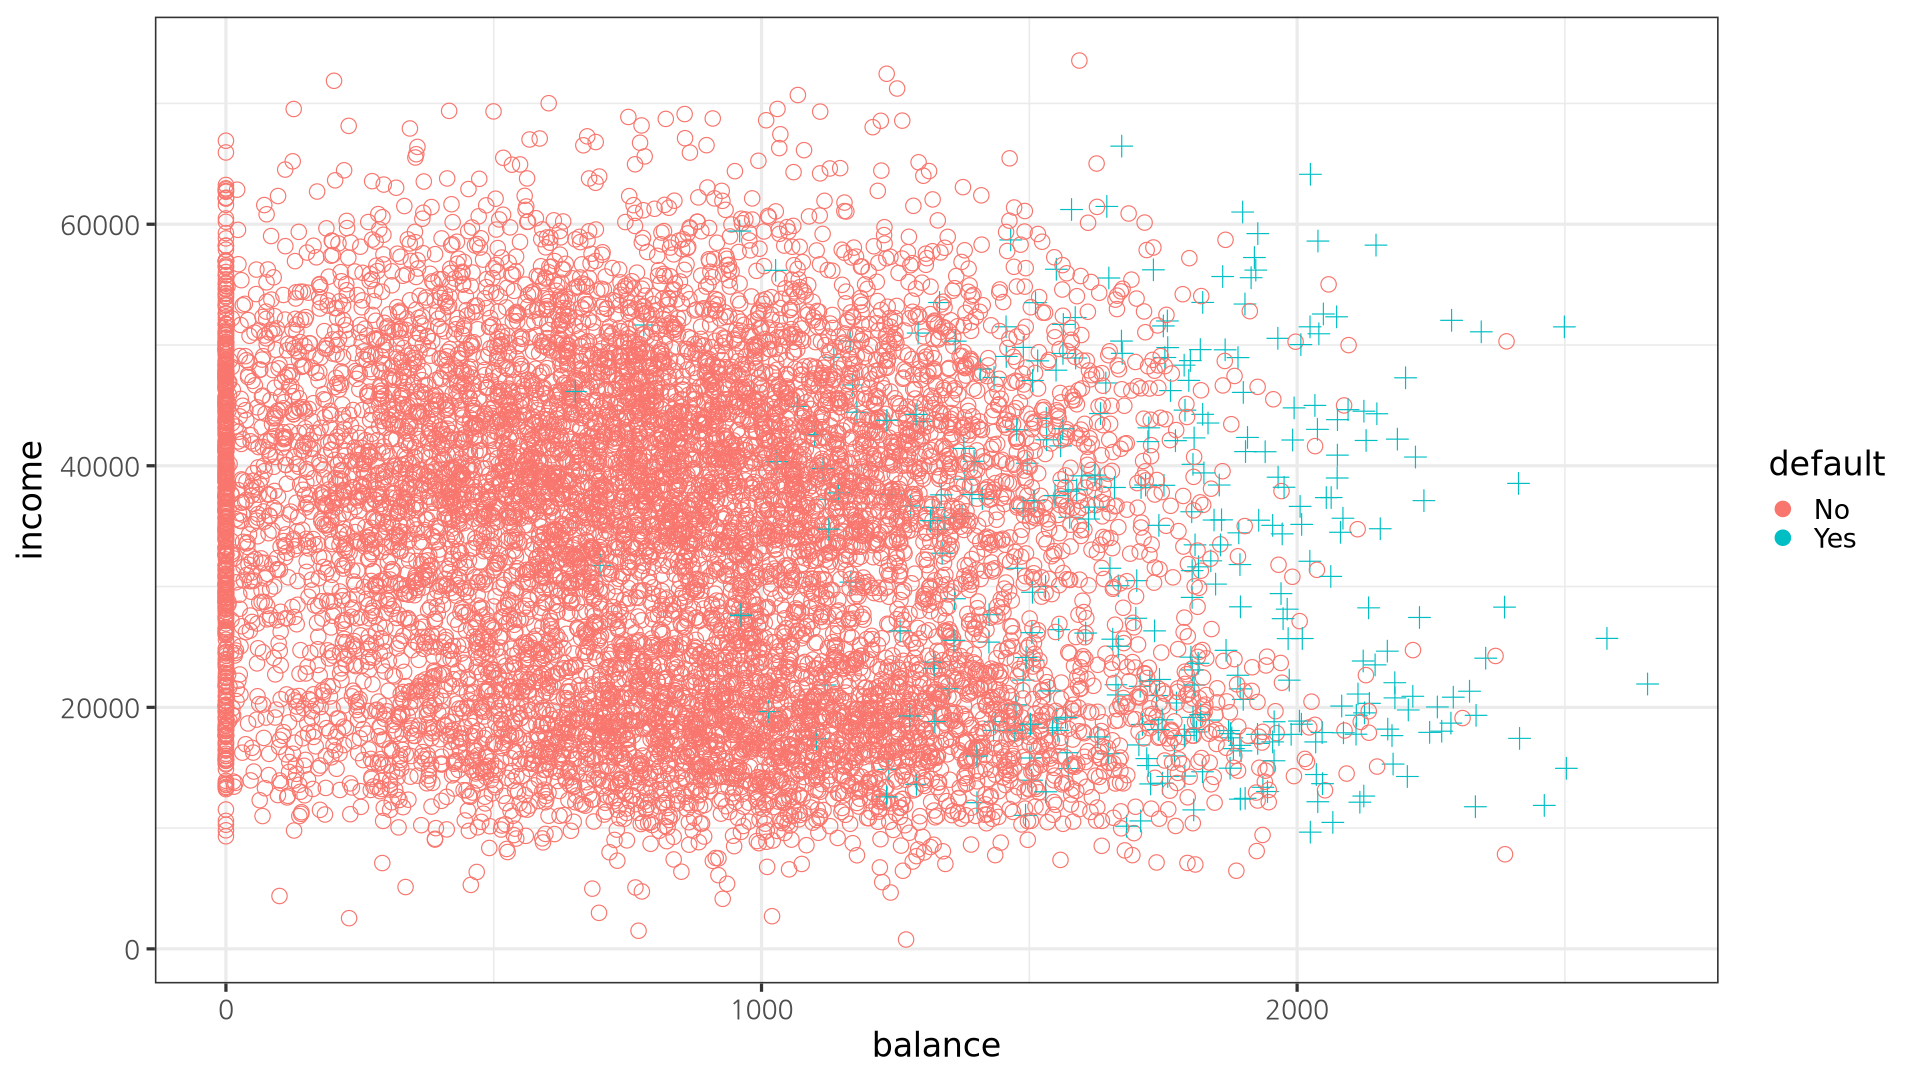

In [5]:
ggplot(Default, aes(balance, income, col = default)) +
    geom_point(size = 4, pch = ifelse(Default$default == "No", 1, 3)) +
    theme_bw(base_size = 20)

> `income`은 값에 따라 디폴트가 별로 차이가 없어보이지만, `balance`의 경우는 클수록 디폴트가 많음.

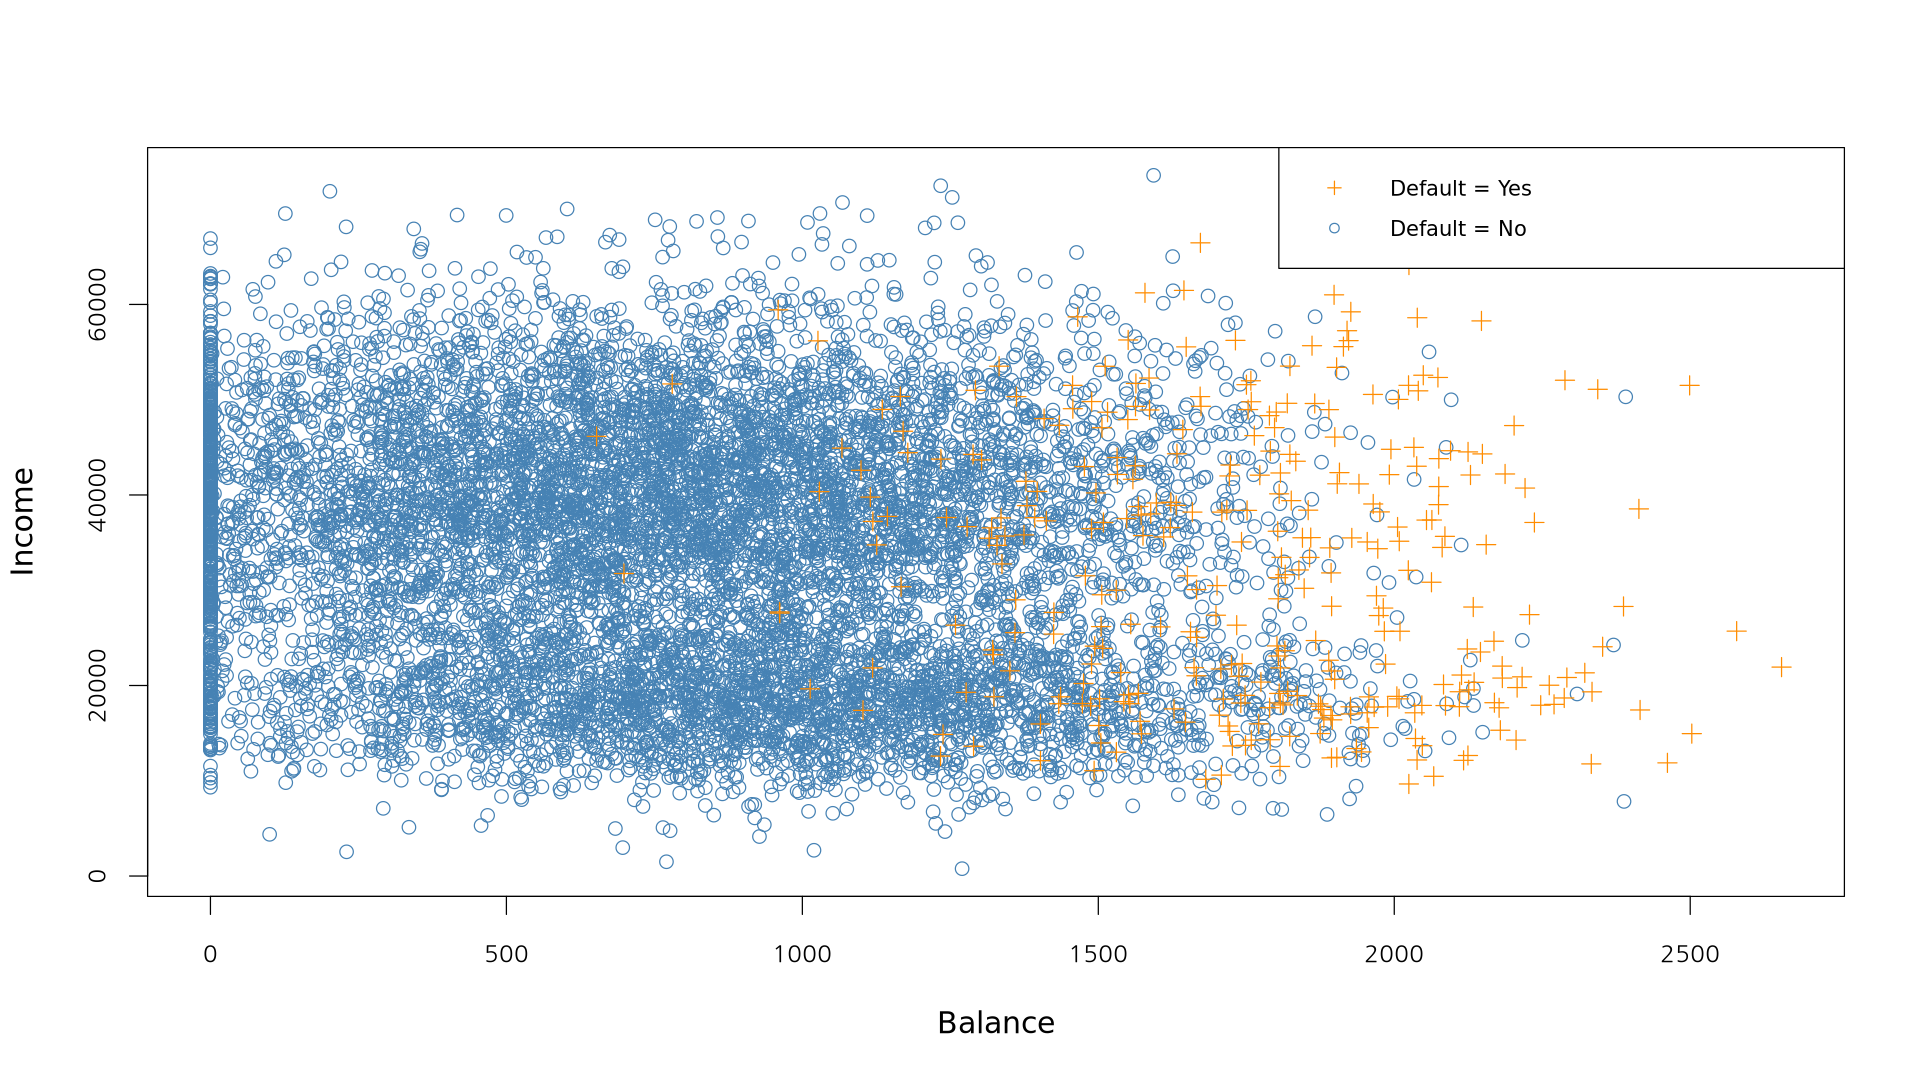

In [8]:
par(cex=1.5)
plot(Default$balance, Default$income,type='n',
    xlab='Balance',
    ylab = 'Income',
    cex.axis = 0.8)
points(Default[Default$default=='No',]$balance,
Default[Default$default=='No',]$income,col='steelblue')
points(Default[Default$default=='Yes',]$balance,
    Default[Default$default=='Yes',]$income,col='darkorange', pch=3)
    legend("topright", c("Default = Yes", "Default = No"),
    col=c('darkorange', 'steelblue'),
    pch = c(3,1),
    # bty = "n",
    cex=0.7)

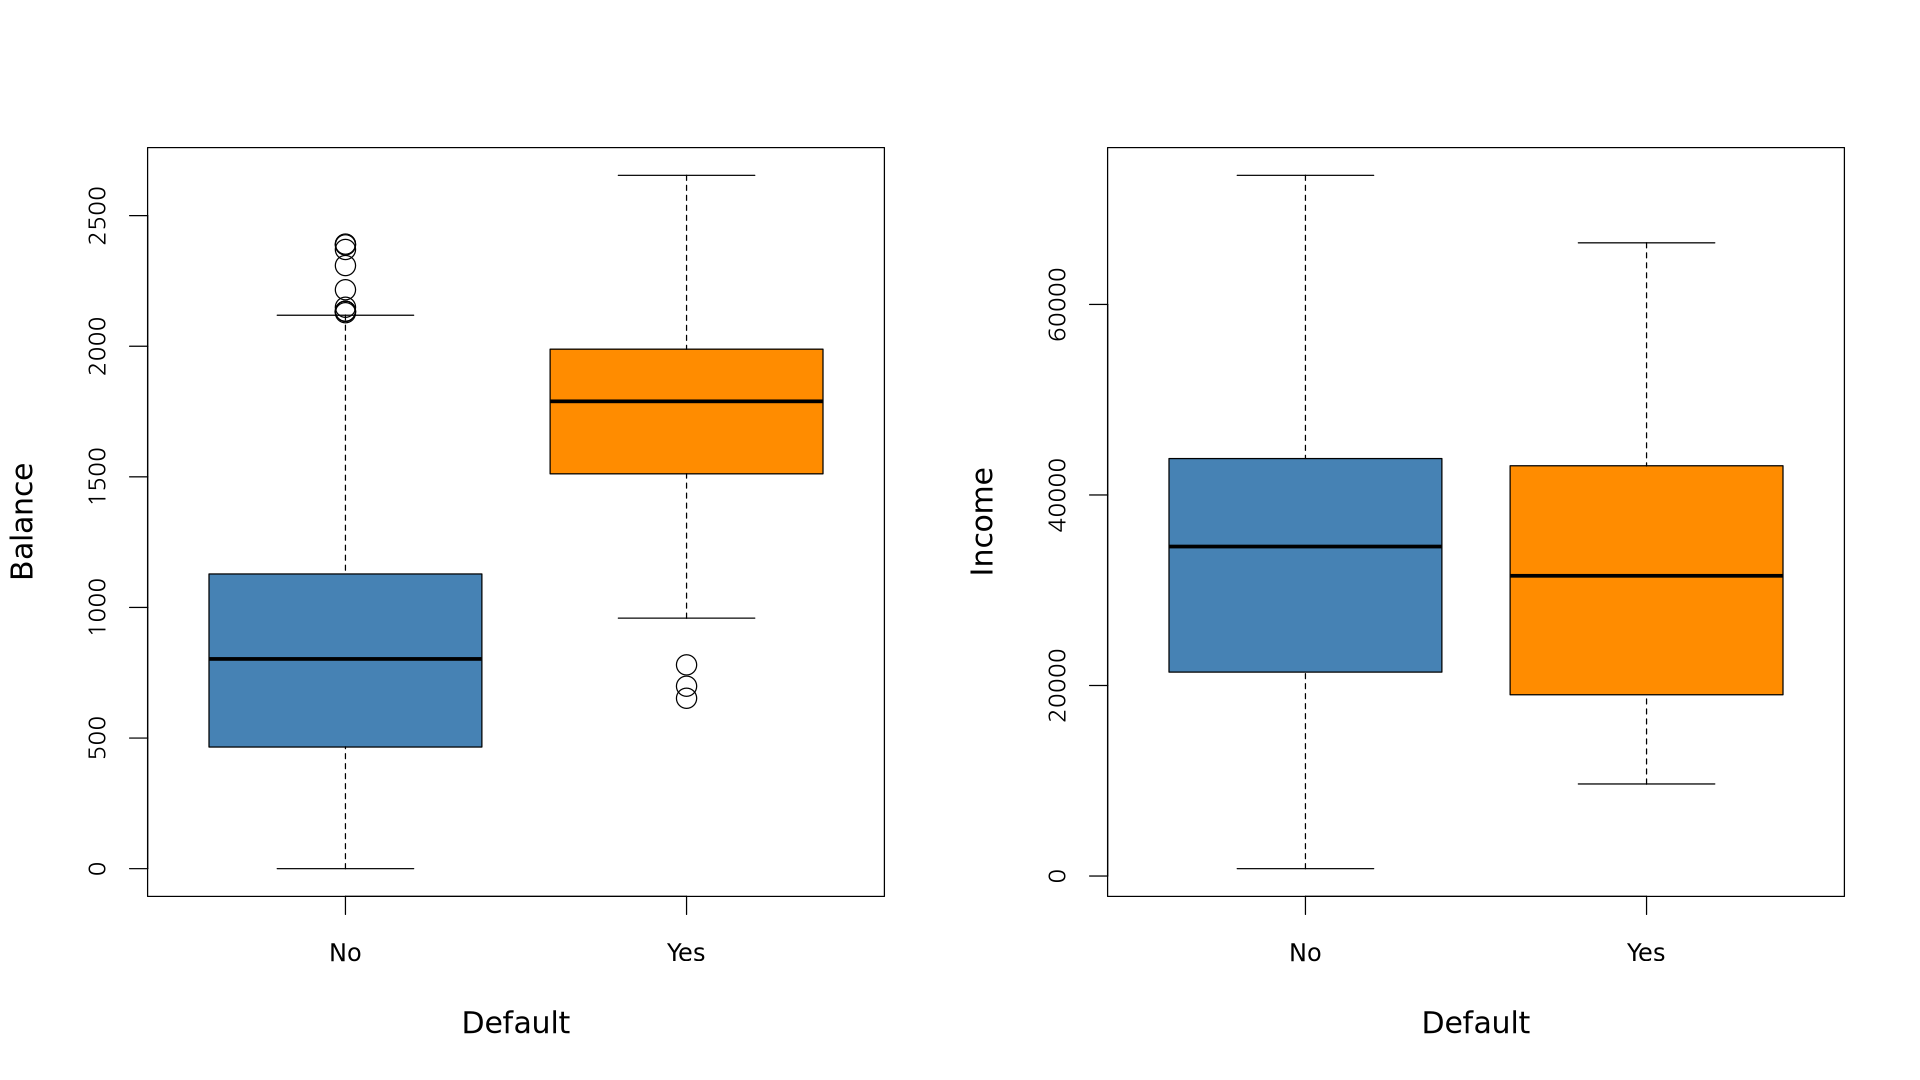

In [9]:
par(mfrow=c(1,2), cex=1.5)
boxplot(balance~default, data=Default,cex.axis = 0.8,
    xlab = 'Default', ylab='Balance', col=c('steelblue', 'darkorange'))
boxplot(income~default, data=Default,cex.axis = 0.8,
    xlab = 'Default', ylab='Income', col=c('steelblue', 'darkorange'))

> 범주형 변수는 상자 그림으로 확인하는 게 좋음. 산점도에서 말했듯이 `Balance`는 디폴트한 그룹이 컸고, `income`은 그룹 간 차이가 별로 없었다.

**1. 선형 모형**

$y = \beta_0 + \beta_1 x_1 + \epsilon$

$p(x) = \beta_0 + \beta_1 x_1 + \epsilon$

In [10]:
lm_fits = lm(as.numeric(default)-1 ~ balance, data = Default)  ## lm에서는 y에 factor가 나오면 안됨.
summary(lm_fits)


Call:
lm(formula = as.numeric(default) - 1 ~ balance, data = Default)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23533 -0.06939 -0.02628  0.02004  0.99046 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.519e-02  3.354e-03  -22.42   <2e-16 ***
balance      1.299e-04  3.475e-06   37.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1681 on 9998 degrees of freedom
Multiple R-squared:  0.1226,	Adjusted R-squared:  0.1225 
F-statistic:  1397 on 1 and 9998 DF,  p-value: < 2.2e-16


> 모형도 상당히 유의하긴 한데, 계수도 이상하고 예측값도 이상할 것 같음.

In [12]:
fitted(lm_fits) |> head()

1            2            3            4            5            6 
 0.019553239  0.030937043  0.064232213 -0.006457028  0.026842885  0.044237010

확률이 음수??

In [13]:
as.numeric(Default$default)  ## r은 1부터 시작...

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [37] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
   [73] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
  [145] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [181] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1
  [253] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [325] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1
  [361] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [397] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [433] 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [469] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [505] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [541] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [577] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [613] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [649] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [685] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
  [721] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [757] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [793] 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [829] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [865] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [901] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
  [937] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [973] 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1009] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 [1045] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1081] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1117] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1225] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 [1261] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1333] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 [1369] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1405] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1441] 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1477] 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 [1513] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1549] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1585] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 [1621] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 [1657] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1693] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1729] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1765] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [18

### 로지스틱 모형

$$\log \bigg(\frac{p(x)}{1-p(x)}\bigg) = \beta_0 + \beta_1 x ~ \Rightarrow ~ p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$

In [15]:
## generalized linear model
glm_fits = glm(default ~ balance,
              data = Default, family = binomial)  ## berrnoulli, binomial -> logistic regression
summary(glm_fits)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [18]:
# ?family

binomial : link = 'logistic'

gaussian : link = 'identity'

> 모형의 적합도는 $R^2$(확률은 실제값이 없음)가 존재할 수 없으므로 AIC로 한다.
>
> deviance로도 가설검증을 할 수가 있긴 한데(작을수록 좋음), 아무튼 그렇다.

> 개별 회귀계수는 MLE의 특성상 정규분포로 근사시키기 때문에(최대가능도비?) z-value로 검정
>
> Number of Fisher Scoring iterations는 근사의 자유도에 대한 뭐 뭐시기 그런거

$$\log \bigg(\frac{p(x)}{1-p(x)}\bigg) = \beta_0 + \beta_1 x ~ \Rightarrow ~ p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}$$

In [20]:
head(fitted(glm_fits))  ## 이건 확률값이 맞음. logits이 아님...

1            2            3            4            5            6 
0.0013056797 0.0021125949 0.0085947405 0.0004344368 0.0017769574 0.0037041528

In [21]:
predict(glm_fits, data.frame(balance = 2000))  ## type = 'link'
predict(glm_fits, data.frame(balance = 2000), type = 'response')

1 
0.3465032

1 
0.5857694

> `fitted`는 확률값을 산출하지만, `predict`는 기본적으로 logit을 산출한다.

In [23]:
coef(glm_fits)[1] + 2000*coef(glm_fits)[2]

(Intercept) 
  0.3465032

In [25]:
exp(coef(glm_fits)[1] + 2000*coef(glm_fits)[2])/(1 + exp(coef(glm_fits)[1] + 2000*coef(glm_fits)[2]))

(Intercept) 
  0.5857694

`-` 시각화

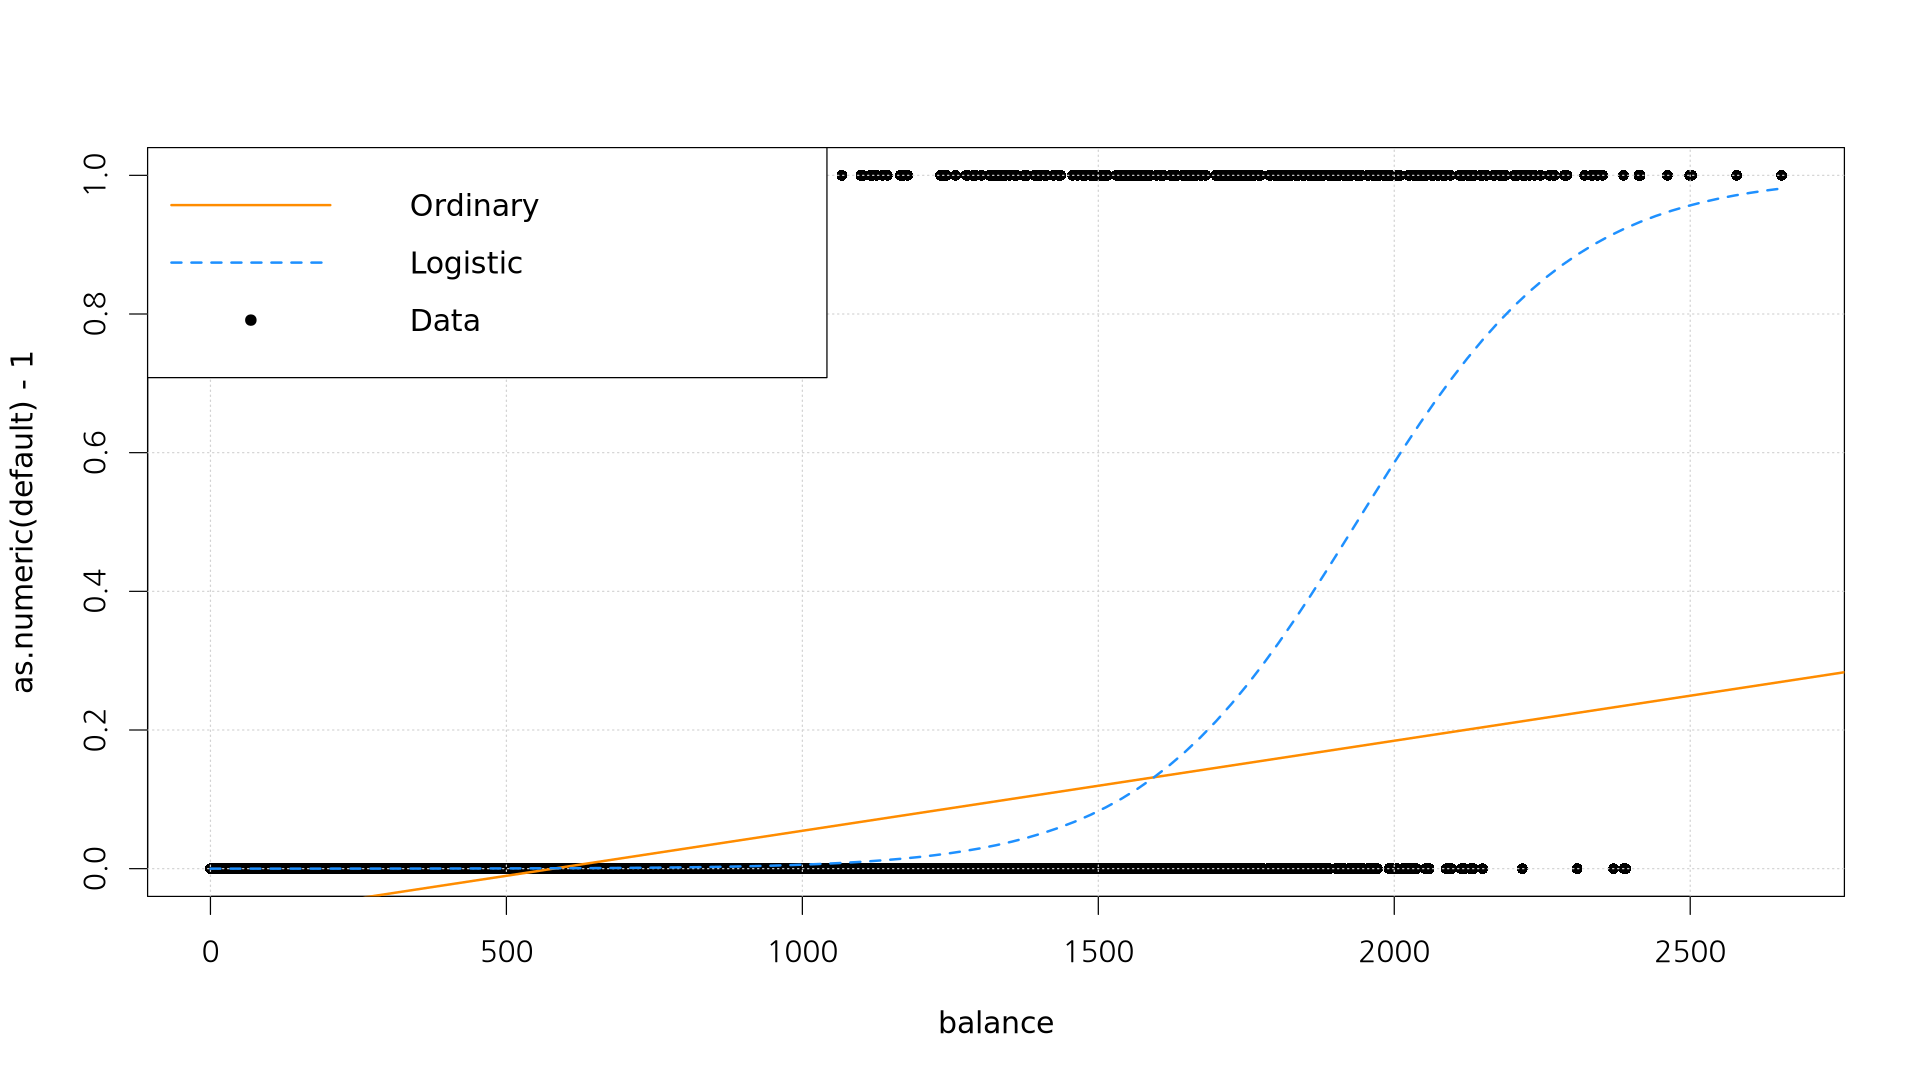

In [28]:
par(cex=1.5)
plot(as.numeric(default)-1 ~ balance,data = Default, pch=16, cex=0.8)
grid()
abline(lm_fits, col='darkorange', lwd=2)
curve(predict(glm_fits,data.frame(balance=x), type = "response"),
     add = TRUE, col = "dodgerblue", lty = 2, lwd=2)  ## 시각화 할 때, 무조건 response, P(x)_hat으로
legend("topleft", c("Ordinary", "Logistic", "Data"), lty = c(1, 2, 0),
     pch = c(NA, NA, 20), lwd = 2, col = c("darkorange", "dodgerblue", "black"))

In [32]:
y_2000 <- predict(glm_fits, newdata = data.frame(balance=2000), type='response')
y_1000 <- predict(glm_fits, newdata = data.frame(balance=1000), type='response')

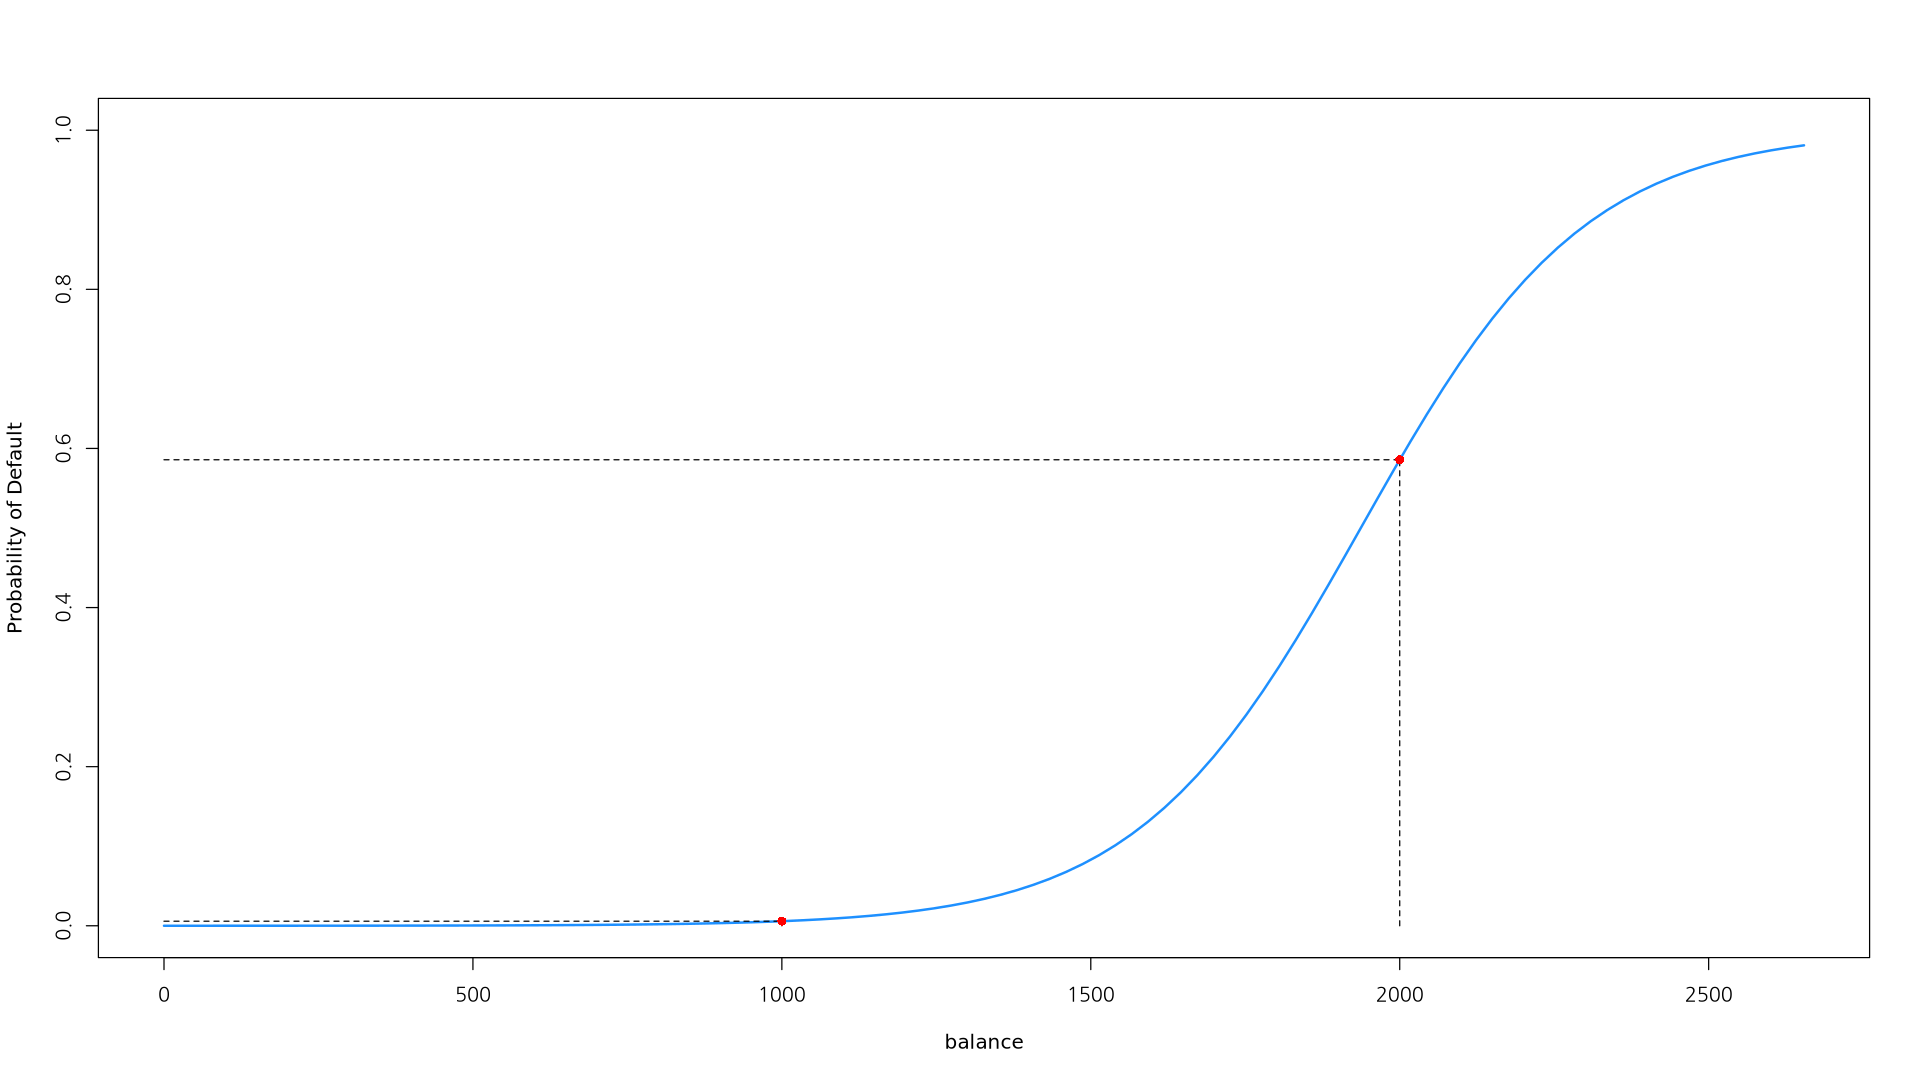

In [33]:
plot(as.numeric(default)-1 ~ balance,data = Default,
    ylab = "Probability of Default" ,
    pch=16, cex=0.8, type='n')

curve(predict(glm_fits,data.frame(balance=x), type = "response"),
    add = TRUE, col = "dodgerblue", lwd=2)

lines(c(0, 2000),c(y_2000, y_2000), lty=2)
lines(c(2000, 2000),c(0, y_2000), lty=2)
points(2000, y_2000, col='red', cex=1, pch=16)

lines(c(0, 1000),c(y_1000, y_1000), lty=2)
lines(c(1000, 1000),c(0, y_1000), lty=2)
points(1000, y_1000, col='red', cex=1, pch=16)

### 로지스틱 신뢰구간

In [34]:
summary(glm_fits)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [35]:
confint(glm_fits, level = 0.95)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-11.383288936,-9.966565064
balance,0.005078926,0.005943365


> 표준오차가 나오긴 하니까... z-quantile을 이용하여 근사 신뢰구간을 내놓을 수 있음...

In [36]:
summary(glm_fits)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.651330614,0.3611573721,-29.49221,3.623124e-191
balance,0.005498917,0.0002203702,24.95309,1.976602e-137


In [39]:
summary(glm_fits)$coef[2, 1] + qnorm(0.975)*summary(glm_fits)$coef[2, 2]  ## 정규분포 quantile 사용!!
summary(glm_fits)$coef[2, 1] - qnorm(0.975)*summary(glm_fits)$coef[2, 2]

[1] 0.005930835

[1] 0.005066999

> 위랑 값이 좀 다름... 왜냐, 위에는 약간 수치적인 접근으로 하는 거고, 아래는 표준오차로 하는 거라 그럼...

### 분류 모형

In [40]:
fitted_default_prob = predict(glm_fits, type = 'response')
head(fitted_default_prob)

1            2            3            4            5            6 
0.0013056797 0.0021125949 0.0085947405 0.0004344368 0.0017769574 0.0037041528

In [41]:
class_default = ifelse(fitted_default_prob >= 0.5, 'Yes', 'No')
head(class_default)

1    2    3    4    5    6 
"No" "No" "No" "No" "No" "No"

In [44]:
table(Default$default, class_default)  ## Confusion matrix

     class_default
        No  Yes
  No  9625   42
  Yes  233  100

> 정분류율(Accuracy) : (9625 + 100) / 10000

In [52]:
sum(diag(table(Default$default, class_default)))/nrow(Default)

[1] 0.9725

In [53]:
table(Default$default)


  No  Yes 
9667  333 

> 뭐... 그렇게 많이 찾아내지 못함. 만약 TP를 올리고 싶다면??

In [54]:
class_default = ifelse(fitted_default_prob >= 0.3, 'Yes', 'No')
head(class_default)

1    2    3    4    5    6 
"No" "No" "No" "No" "No" "No"

In [55]:
table(Default$default, class_default)

     class_default
        No  Yes
  No  9520  147
  Yes  166  167

In [56]:
sum(diag(table(Default$default, class_default)))/nrow(Default)

[1] 0.9687

In [58]:
class_default = ifelse(fitted_default_prob >= 0.2, 'Yes', 'No')
head(class_default)

1    2    3    4    5    6 
"No" "No" "No" "No" "No" "No"

In [59]:
table(Default$default, class_default)

     class_default
        No  Yes
  No  9404  263
  Yes  134  199

In [60]:
sum(diag(table(Default$default, class_default)))/nrow(Default)

[1] 0.9603

목표에 따라 절단값 $c$를 다르게 설정해야 한다. TP를 높이기 위해서라면 $c$를 낮춘다... 그럼 정분류율은 떨어진다.

In [65]:
cut_value = seq(0.01, 0.99, 0.01)
acc = c()

In [66]:
for (k in 1:length(cut_value)) {
    class_default = ifelse(fitted_default_prob > cut_value[k], 'Yes', 'No')
    acc[k] = sum(Default$default == class_default)/10000
}

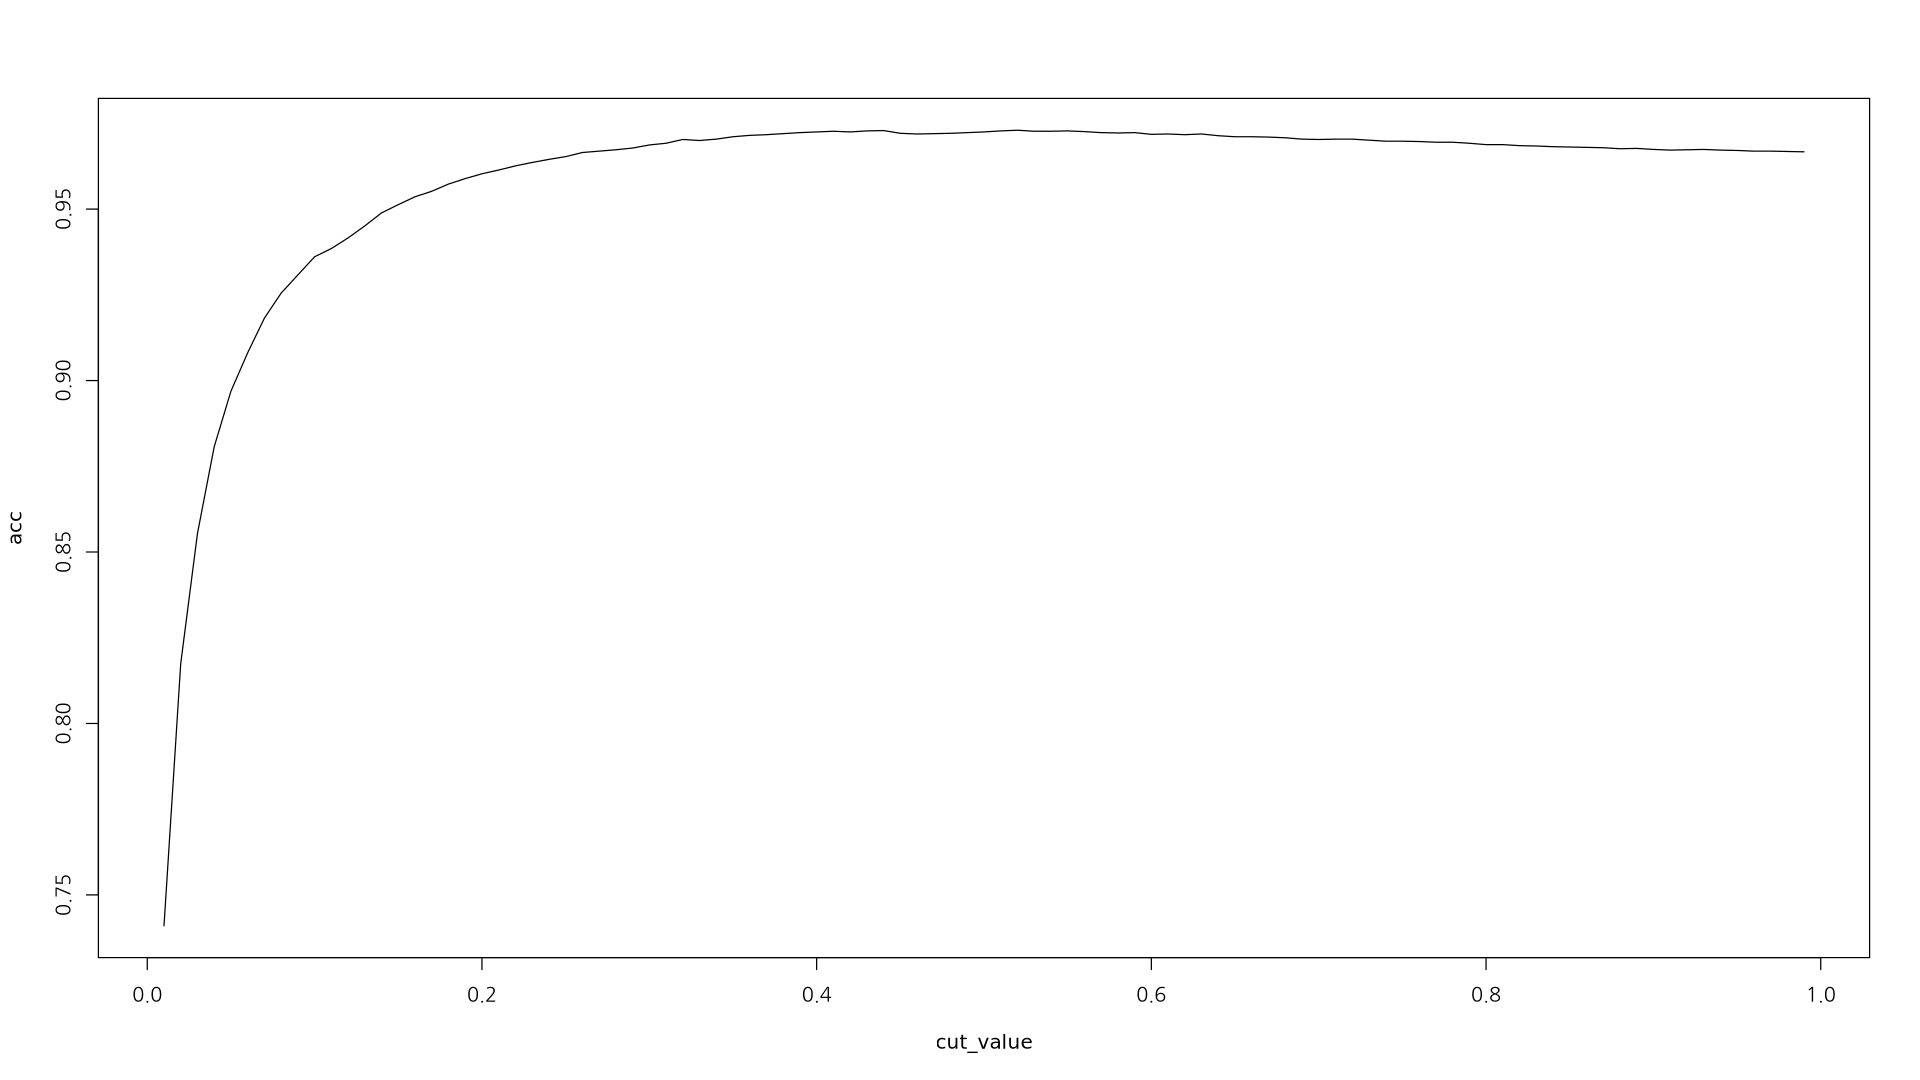

In [68]:
plot(cut_value, acc, type = 'l')

> `cut_value`에 따라서 정분류율이 증가하다가 어느 순간부터 감소.

In [69]:
which.max(acc)

[1] 52

In [73]:
print(cut_value[52])  ## accuracy를 최대로 하는 절단값
print(acc[52])

[1] 0.52
[1] 0.973


In [76]:
table(Default$default, ifelse(fitted_default_prob > 0.52, 'Yes', 'No'))

     
        No  Yes
  No  9632   35
  Yes  235   98

> TP가 너무 작음. 원하는 결과를 얻지 못할 수도 있음 -> 기계학습에서 분류 모형 하면서 배움.